**Import libriaries**

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Import Data**

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df.info()
train_df.describe()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Pre-Analysis**

In [3]:
# searching for women survived
women = (train_df.loc[train_df.Sex == 'female']['PassengerId']).count()
print(women)
women_survived = (train_df.loc[train_df.Sex == 'female'][train_df.Survived == True]['Survived']).count()
print(women_survived)
women_died = (train_df.loc[train_df.Sex == 'female'][train_df.Survived == False]['Survived']).count()
print(women_died)
rate_women_survived = women_survived / women
print("% of women who survived:", round(rate_women_survived * 100, 2))

314
233
81
% of women who survived: 74.2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [4]:
# searching for men survived
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", round((rate_men * 100), 2))

% of men who survived: 18.89


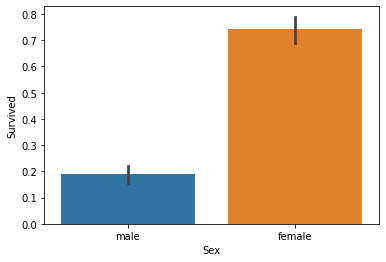

In [5]:
# Making a plot
import seaborn as sns
sns.barplot(x = "Sex", y = "Survived", data = train_df);

<AxesSubplot:xlabel='Age'>

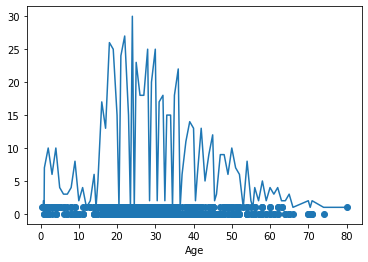

In [6]:
# looking for amount of survived depending on age
import matplotlib.pyplot as plt
plt.scatter(train_df.Age, train_df.Survived, s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None)
sr_age = train_df.groupby(['Age'])['Survived'].count().reindex()
sr_age.plot()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


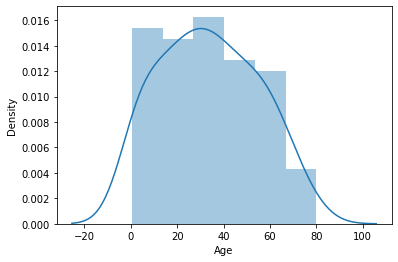

In [7]:
# making DataFrame with "Age" and amount of "Survived" + looking for distribution
listik = [i for i in range(1, len(sr_age) + 1)]
df_age = pd.DataFrame(sr_age)
df_age.reset_index(level = 0, inplace = True)
df_age.head()

sns_plot = sns.distplot(df_age['Age'])
fig = sns_plot.get_figure()



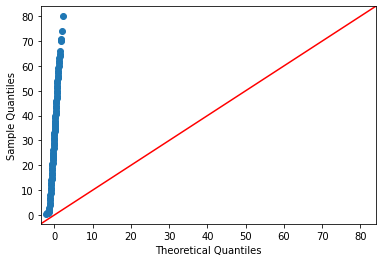

In [8]:
import statsmodels.api as sm
fig = sm.qqplot(df_age['Age'], line='45')

In [9]:
# Looking for correlation between age and survived amount
def cov(x, y):
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum()/(x.size - 1)

def cor(x, y):
    return cov(x, y)/(np.std(x, ddof=1)*np.std(y, ddof=1))


print("cov = ", cov(df_age["Age"], df_age["Survived"]))
print("rxy = ", cor(df_age["Age"], df_age["Survived"]))
print("R2 = ", (cor(df_age["Age"], df_age["Survived"]))**2)

cov =  -32.973785266457675
rxy =  -0.19855415712888605
R2 =  0.03942375331316237


In [10]:
# Encode target labels: Sex and Embarked 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_df.Sex)
train_df['Sex_le'] = le.transform(train_df.Sex)
le.fit(train_df.Embarked)
train_df['Embarked_le'] = le.transform(train_df.Embarked)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_le,Embarked_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Sex_le          0.042939 -0.543351  0.131900  0.093254 -0.114631 -0.245489   
Embarked_le     0.013083 -0.163517  0.157112 -0.025252  0.066654  0.038322   

                 Fare    Sex_le  Embarked_le  
PassengerId  0.012658  0.042939     0.013083  
Survived     0.257307 -0.543351    -0.163517  
Pclass      -0.549500  0.131900     0.157112  
Age          0.096067  0.093254

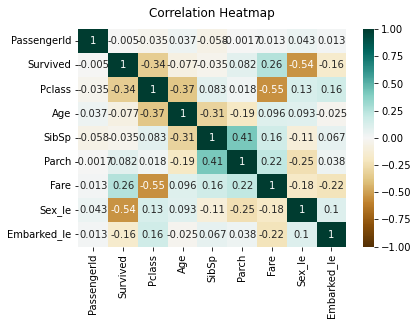

In [11]:
# Making a correlation table for train_df
print(train_df.corr())
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

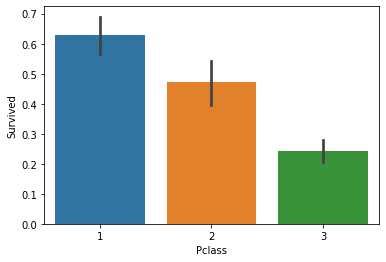

In [12]:
# Looking for more correlation
sns.barplot(x="Pclass", y="Survived", data=train_df)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

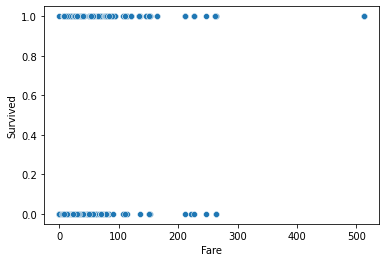

In [13]:
sns.scatterplot(x="Fare", y="Survived", data=train_df)

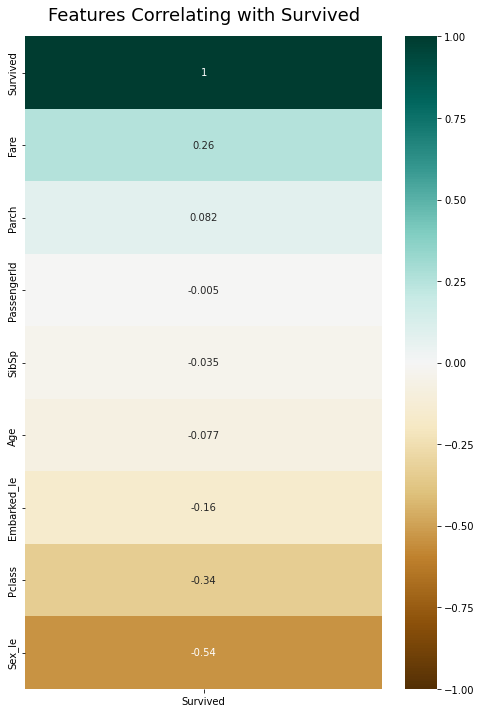

In [14]:
train_df.corr()[['Survived']].sort_values(by='Survived', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_df.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);

In [15]:
# Dropping unimportant columns
train_df2 = train_df[['Survived', "Pclass", "Sex_le", "Embarked_le", "Fare"]]
train_df2.head()

,Survived,Pclass,Sex_le,Embarked_le,Fare
0,0,3,1,2,7.2500
1,1,1,0,0,71.2833
2,1,3,0,2,7.9250
3,1,1,0,2,53.1000
4,0,3,1,2,8.0500


In [16]:
import statsmodels.formula.api as smf
result = smf.ols(formula = "Survived ~ Pclass + Sex_le + Embarked_le + Fare", data = train_df2).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     131.5
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           3.58e-88
Time:                        06:27:12   Log-Likelihood:                -414.33
No. Observations:                 891   AIC:                             838.7
Df Residuals:                     886   BIC:                             862.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1198      0.059     18.986      

In [17]:
# Dropping unimportant column "Fare"
train_df2 = train_df2[['Survived', "Pclass", "Sex_le", "Embarked_le"]]
train_df2.head()

,Survived,Pclass,Sex_le,Embarked_le
0,0,3,1,2
1,1,1,0,0
2,1,3,0,2
3,1,1,0,2
4,0,3,1,2


**Dividing dataset for training and test**

In [18]:
# Dividing dataset
import seaborn as sns
y = train_df.Survived
x = train_df2.drop('Survived',axis=1)

# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2)

**Train our model**

**1. Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

In [44]:
classifier = RandomForestClassifier(n_estimators = 102, max_depth = 7, random_state = 1)

# Train the model using the training sets
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=102, random_state=1)

In [45]:
# Predictin on the train_test set
y_pred = classifier.predict(x_test)
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8603351955307262


**Prepare test dataset**

In [35]:
# Encode target labels on test set: Sex and Embarked 
le.fit(test_df.Sex)
test_df['Sex_le'] = le.transform(test_df.Sex)
le.fit(test_df.Embarked)
test_df['Embarked_le'] = le.transform(test_df.Embarked)

# Dropping unimportant columns
test_df2 = test_df[["Pclass", "Sex_le", "Embarked_le"]]

# Standardize the dataset
test_scaled = scaler.fit_transform(test_df2)


In [38]:
# Predictin on the test-test set
predictions = classifier.predict(test_scaled)

**2. Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [53]:
y_pred2 = logreg.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.770949720670391


**3. Decision Tree**

In [56]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 5)
clf_tree.fit(x_train,y_train)
y_pred3 = clf_tree.predict(x_test)
print("For depth = 5", " : ",accuracy_score(y_test,y_pred2))

For depth = 5  :  0.770949720670391


In [39]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
